In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [79]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
# kWh -> kW
# Drop the first row and column (headers)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
solargen.index = range(1, len(solargen) + 1)
# Drop the last column: 366 days -> 365 days
solargen = solargen.iloc[:, :-1]

solargen_time_series = solargen

In [81]:
print(solargen.values.flatten())

[0. 0. 0. ... 0. 0. 0.]


In [83]:
print(pd.Series(-solargen.values.flatten()).skew())
print(pd.Series(solargen.values.flatten()).kurt())

-1.5424649169604814
1.1530232145558235


Per day: 96x365 => 1x365

In [ ]:
#time series
for kwp in [1, 5, 10]:
    solargen_kwp = solargen_time_series*kwp
    print("kwp", kwp, " : min, max, yearly load")
    print(round(solargen_kwp.min().min(),2))
    print(round(solargen_kwp.max().max(),2))
    print(round((solargen_kwp/4).values.sum(),2))

    print("kwp", kwp, " : mean, std, var, skew, kurt")
    print(round(solargen_kwp.mean().mean(),2))
    print(round(solargen_kwp.std().mean(),2))
    print(round(solargen_kwp.var().mean(),2))
    print(round(solargen_kwp.skew().mean(),2))
    print(round(solargen_kwp.kurt().mean(),2))

kwp 1  : min, max, yearly load
0.0
1.0
1409.0
kwp 1  : mean, std, var, skew, kurt
0.16
0.2
0.05
1.04
-0.26
kwp 5  : min, max, yearly load
0.0
5.0
7045.0
kwp 5  : mean, std, var, skew, kurt
0.8
1.0
1.34
1.04
-0.26
kwp 10  : min, max, yearly load
0.0
10.0
14090.01
kwp 10  : mean, std, var, skew, kurt
1.61
2.01
5.34
1.04
-0.26


In [ ]:
#first difference on columns
for kwp in [1, 5, 10]:
    solargen_kwp = solargen_time_series*kwp
    solargen_kwp = solargen_kwp.diff().iloc[1:]
    print("kwp", kwp, " : min, max")
    print(round(solargen_kwp.min().min(),2))
    print(round(solargen_kwp.max().max(),2))

    print("kwp", kwp, " : mean, std, var, skew, kurt")
    print(round(solargen_kwp.abs().mean().mean(),2))
    print(round(solargen_kwp.std().mean(),2))
    print(round(solargen_kwp.var().mean(),2))
    print(round(solargen_kwp.skew().mean(),2))
    print(round(solargen_kwp.kurt().mean(),2))

kwp 1  : min, max
-0.23
0.19
kwp 1  : mean, std, var, skew, kurt
0.01
0.02
0.0
-0.08
2.42
kwp 5  : min, max
-1.15
0.95
kwp 5  : mean, std, var, skew, kurt
0.07
0.11
0.01
-0.08
2.42
kwp 10  : min, max
-2.29
1.9
kwp 10  : mean, std, var, skew, kurt
0.13
0.22
0.06
-0.08
2.42


Statistical moments

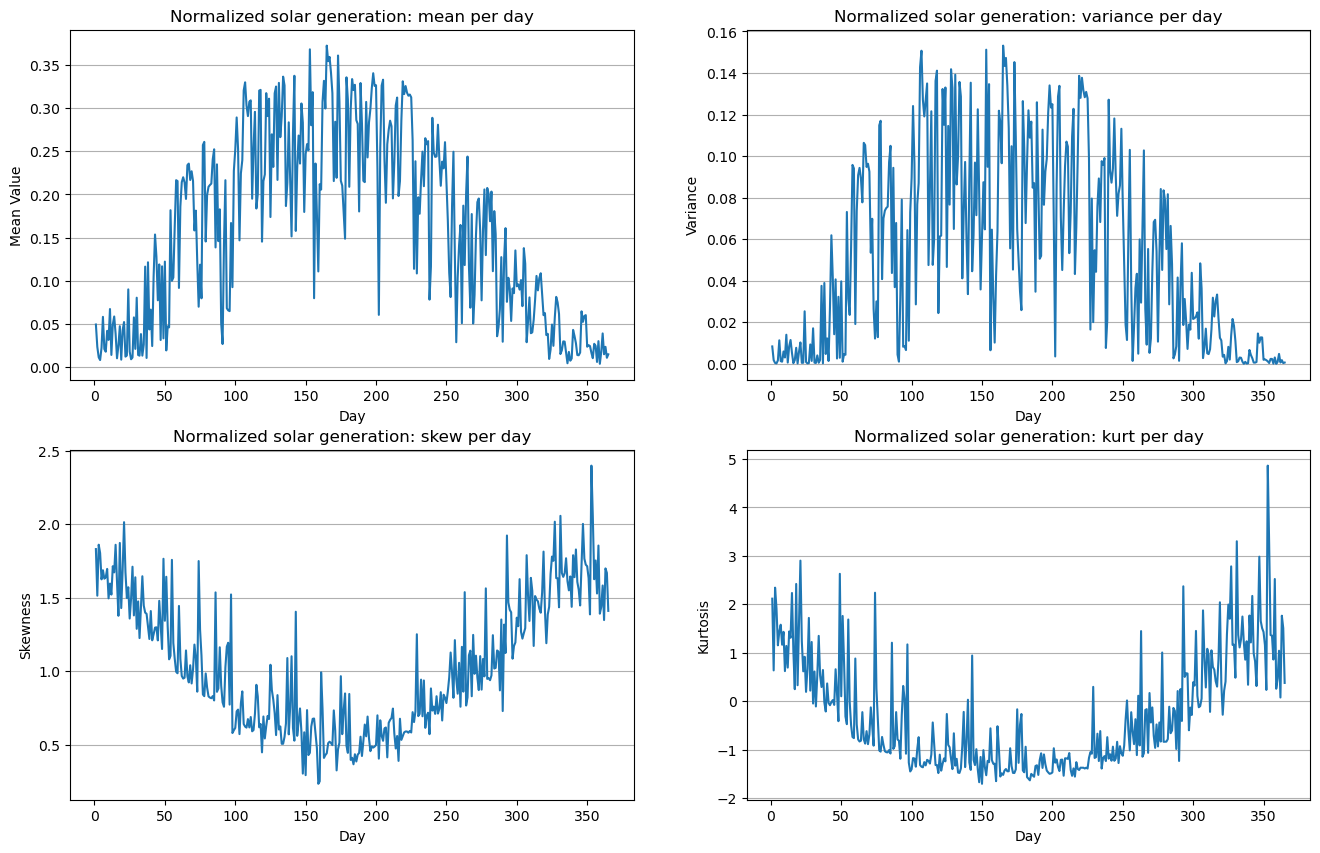

In [ ]:
solargen_mean = solargen.mean(axis=0)
solargen_var = solargen.var(axis=0)
solargen_skew = solargen.skew(axis=0)
solargen_kurt = solargen.kurt(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(solargen_mean.index, solargen_mean)
axs[0,0].set_title('Normalized solar generation: mean per day')
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var.index, solargen_var)
axs[0,1].set_title('Normalized solar generation: variance per day')
axs[0,1].set_xlabel('Day')
axs[0,1].set_ylabel('Variance')
axs[0,1].grid(axis='y')

axs[1,0].plot(solargen_skew.index, solargen_skew)
axs[1,0].set_title('Normalized solar generation: skew per day')
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Skewness')
axs[1,0].grid(axis='y')

axs[1,1].plot(solargen_kurt.index, solargen_kurt)
axs[1,1].set_title('Normalized solar generation: kurt per day')
axs[1,1].set_xlabel('Day')
axs[1,1].set_ylabel('Kurtosis')
axs[1,1].grid(axis='y')

In [ ]:
# Mean of the statistical moments
solargen_mean_mean = solargen_mean.mean()
print(round(solargen_mean_mean, 2))
solargen_mean_var = solargen_var.mean()
print(round(solargen_mean_var, 2))
solargen_mean_skew = solargen_skew.mean()
print(round(solargen_mean_skew, 2))
solargen_mean_kurt = solargen_kurt.mean()
print(round(solargen_mean_kurt, 2))

0.16
0.05
1.04
-0.26


In [ ]:
#std
for kwp in [1, 5, 10]:
    solargen_kwp = solargen*kwp
    print("mean", kwp)
    print(round(solargen_kwp.mean().mean(),2))
    print("std", kwp)
    print(round(solargen_kwp.std().mean(),2))
    print("var", kwp)
    print(round(solargen_kwp.var().mean(),2))
    print("skew", kwp)
    print(round(solargen_kwp.skew().mean(),2))
    print("kurt", kwp)
    print(round(solargen_kwp.kurt().mean(),2))




mean 1
0.16
std 1
0.2
var 1
0.05
skew 1
1.04
kurt 1
-0.26
mean 5
0.8
std 5
1.0
var 5
1.34
skew 5
1.04
kurt 5
-0.26
mean 10
1.61
std 10
2.01
var 10
5.34
skew 10
1.04
kurt 10
-0.26


First difference

In [ ]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]
solargen_time_series = solargen
# On columns
solargen = solargen.diff().iloc[1:]

# On rows
#solargen = solargen.diff(axis=1).drop(solargen.columns[0], axis=1)

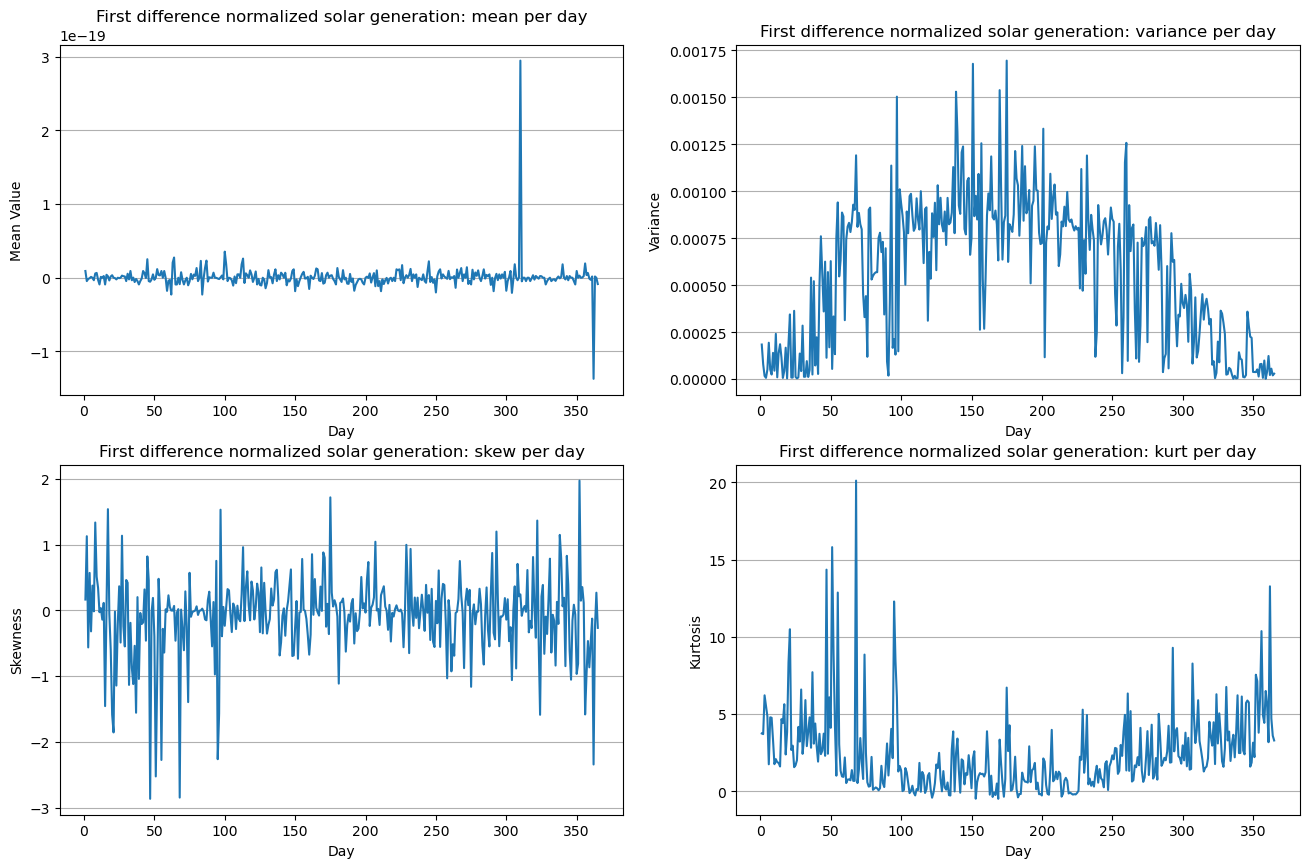

In [ ]:
solargen_mean = solargen.mean(axis=0)
solargen_var = solargen.var(axis=0)
solargen_skew = solargen.skew(axis=0)
solargen_kurt = solargen.kurt(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(solargen_mean.index, solargen_mean)
axs[0,0].set_title('First difference normalized solar generation: mean per day')
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var.index, solargen_var)
axs[0,1].set_title('First difference normalized solar generation: variance per day')
axs[0,1].set_xlabel('Day')
axs[0,1].set_ylabel('Variance')
axs[0,1].grid(axis='y')

axs[1,0].plot(solargen_skew.index, solargen_skew)
axs[1,0].set_title('First difference normalized solar generation: skew per day')
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Skewness')
axs[1,0].grid(axis='y')

axs[1,1].plot(solargen_kurt.index, solargen_kurt)
axs[1,1].set_title('First difference normalized solar generation: kurt per day')
axs[1,1].set_xlabel('Day')
axs[1,1].set_ylabel('Kurtosis')
axs[1,1].grid(axis='y')

In [ ]:
# Mean of the statistical moments
solargen_mean_mean = solargen_mean.mean()
print(round(solargen_mean_mean, 2))
solargen_mean_var = solargen_var.mean()
print(round(solargen_mean_var, 2))
solargen_mean_skew = solargen_skew.mean()
print(round(solargen_mean_skew, 2))
solargen_mean_kurt = solargen_kurt.mean()
print(round(solargen_mean_kurt, 2))

0.0
0.0
-0.08
2.42


Second difference

In [ ]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
solargen = solargen*10
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
solargen.index = range(1, len(solargen) + 1)
solargen = solargen.iloc[:, :-1]

# On the columns
#solargen = solargen.diff().iloc[1:].diff().iloc[1:]

# On the rows
solargen = solargen.diff(axis=1).diff(axis=1).drop(solargen.columns[0:2], axis=1)


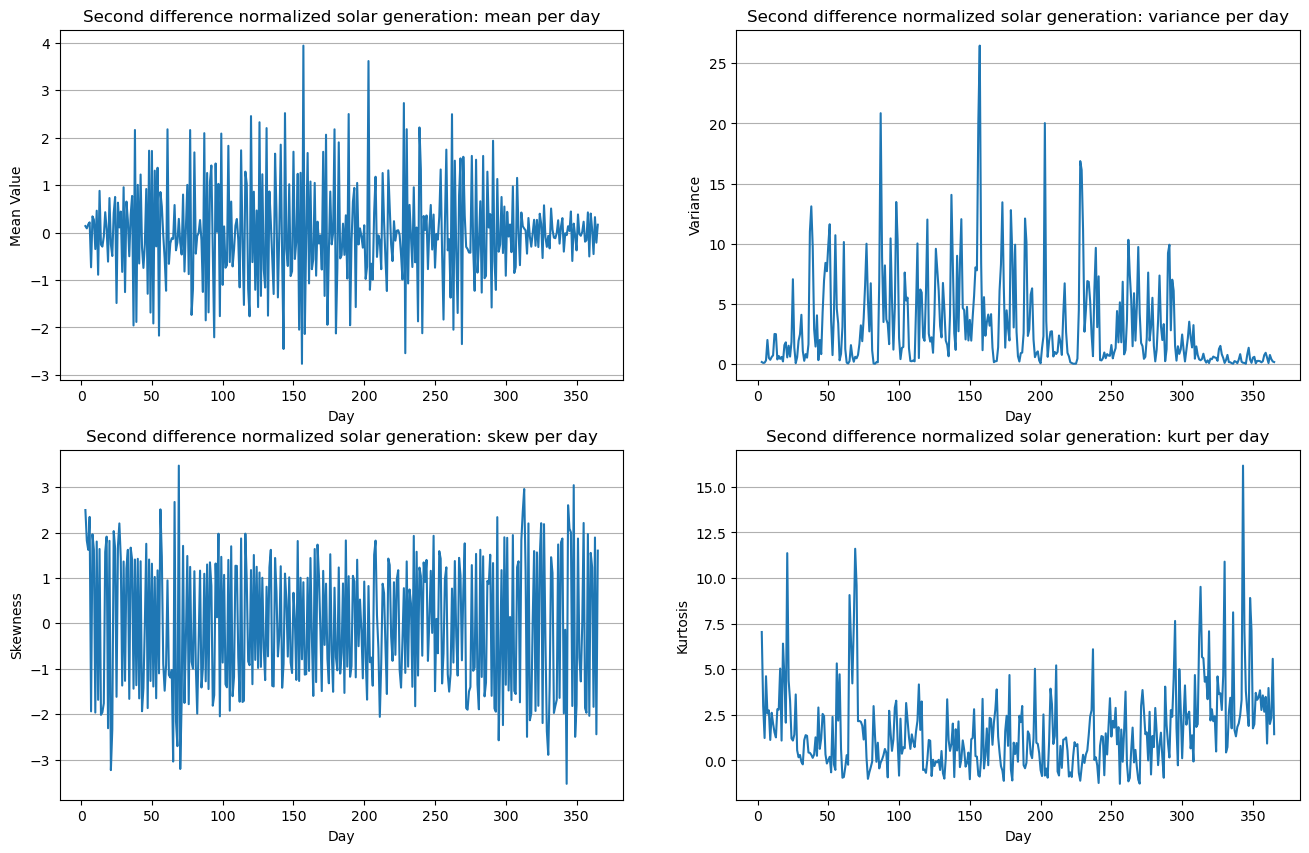

In [ ]:
solargen_mean = solargen.mean(axis=0)
solargen_var = solargen.var(axis=0)
solargen_skew = solargen.skew(axis=0)
solargen_kurt = solargen.kurt(axis=0)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(solargen_mean.index, solargen_mean)
axs[0,0].set_title('Second difference normalized solar generation: mean per day')
axs[0,0].set_xlabel('Day')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var.index, solargen_var)
axs[0,1].set_title('Second difference normalized solar generation: variance per day')
axs[0,1].set_xlabel('Day')
axs[0,1].set_ylabel('Variance')
axs[0,1].grid(axis='y')

axs[1,0].plot(solargen_skew.index, solargen_skew)
axs[1,0].set_title('Second difference normalized solar generation: skew per day')
axs[1,0].set_xlabel('Day')
axs[1,0].set_ylabel('Skewness')
axs[1,0].grid(axis='y')

axs[1,1].plot(solargen_kurt.index, solargen_kurt)
axs[1,1].set_title('Second difference normalized solar generation: kurt per day')
axs[1,1].set_xlabel('Day')
axs[1,1].set_ylabel('Kurtosis')
axs[1,1].grid(axis='y')

In [ ]:
# Mean of the statistical moments
solargen_mean_mean = solargen_mean.mean()
print(round(solargen_mean_mean, 2))
solargen_mean_var = solargen_var.mean()
print(round(solargen_mean_var, 2))
solargen_mean_skew = solargen_skew.mean()
print(round(solargen_mean_skew, 2))
solargen_mean_kurt = solargen_kurt.mean()
print(round(solargen_mean_kurt, 2))

0.0
3.2
-0.05
1.7


Per quarter hour: 96x365 => 96x1

In [ ]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
# kWh -> kW
# Drop the first row and column (headers)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
solargen.index = range(1, len(solargen) + 1)
# Drop the last column: 366 days -> 365 days
solargen = solargen.iloc[:, :-1]

In [ ]:
# TIMESERIES

from openpyxl import Workbook, load_workbook
workbook = Workbook()  # Create a new workbook
sheet = workbook.active

rows = ['min', 'max', '', 'yearly_load', '', 'mean', 'std', 'var', 'skew', 'kurt']
results = pd.DataFrame()
results['Metric'] = rows

for kwp in [1, 5, 10]:
    net_consumption = solargen * kwp
    min_value = round(net_consumption.min().min(), 2)
    max_value = round(net_consumption.max().max(), 2)
    yearly_load = round((net_consumption / 4).values.sum(), 2)
    mean_value = round(net_consumption.mean(axis=1).mean(), 2)
    std_value = round(net_consumption.std(axis=1).mean(), 2)
    var_value = round(net_consumption.var(axis=1).mean(), 2)
    skew_value = round(net_consumption.skew(axis=1).mean(), 2)
    kurt_value = round(net_consumption.kurt(axis=1).mean(), 2)

    # Create a list of metrics with placeholders for blank rows
    metrics = [min_value, max_value, '', yearly_load, '', mean_value, std_value, var_value, skew_value, kurt_value]

    # Add the metrics as a column to the results DataFrame
    results[f"Kwp {kwp}"] = metrics
results = results.set_index('Metric')

# Save the results to an Excel file
results.to_excel("time_series.xlsx")


        

In [ ]:
# first difference on rows

from openpyxl import Workbook, load_workbook
workbook = Workbook()  # Create a new workbook
sheet = workbook.active

rows = ['min', 'max', 'mean', 'std', 'var', 'skew', 'kurt']
results = pd.DataFrame()
results['Metric'] = rows

for kwp in [1, 5, 10]:
    net_consumption = solargen*kwp
    net_consumption = net_consumption.diff(axis=1).drop(net_consumption.columns[0], axis=1)

    min_value = round(net_consumption.min().min(), 2)
    max_value = round(net_consumption.max().max(), 2)
    mean_value = round(net_consumption.abs().mean(axis=1).mean(), 2)
    std_value = round(net_consumption.std(axis=1).mean(), 2)
    var_value = round(net_consumption.var(axis=1).mean(), 2)
    skew_value = round(net_consumption.skew(axis=1).mean(), 2)
    kurt_value = round(net_consumption.kurt(axis=1).mean(), 2)

    # Create a list of metrics with placeholders for blank rows
    metrics = [min_value, max_value, mean_value, std_value, var_value, skew_value, kurt_value]

    # Add the metrics as a column to the results DataFrame
    results[f"Kwp {kwp}"] = metrics
results = results.set_index('Metric')

# Save the results to an Excel file
results.to_excel("first_difference.xlsx")


        

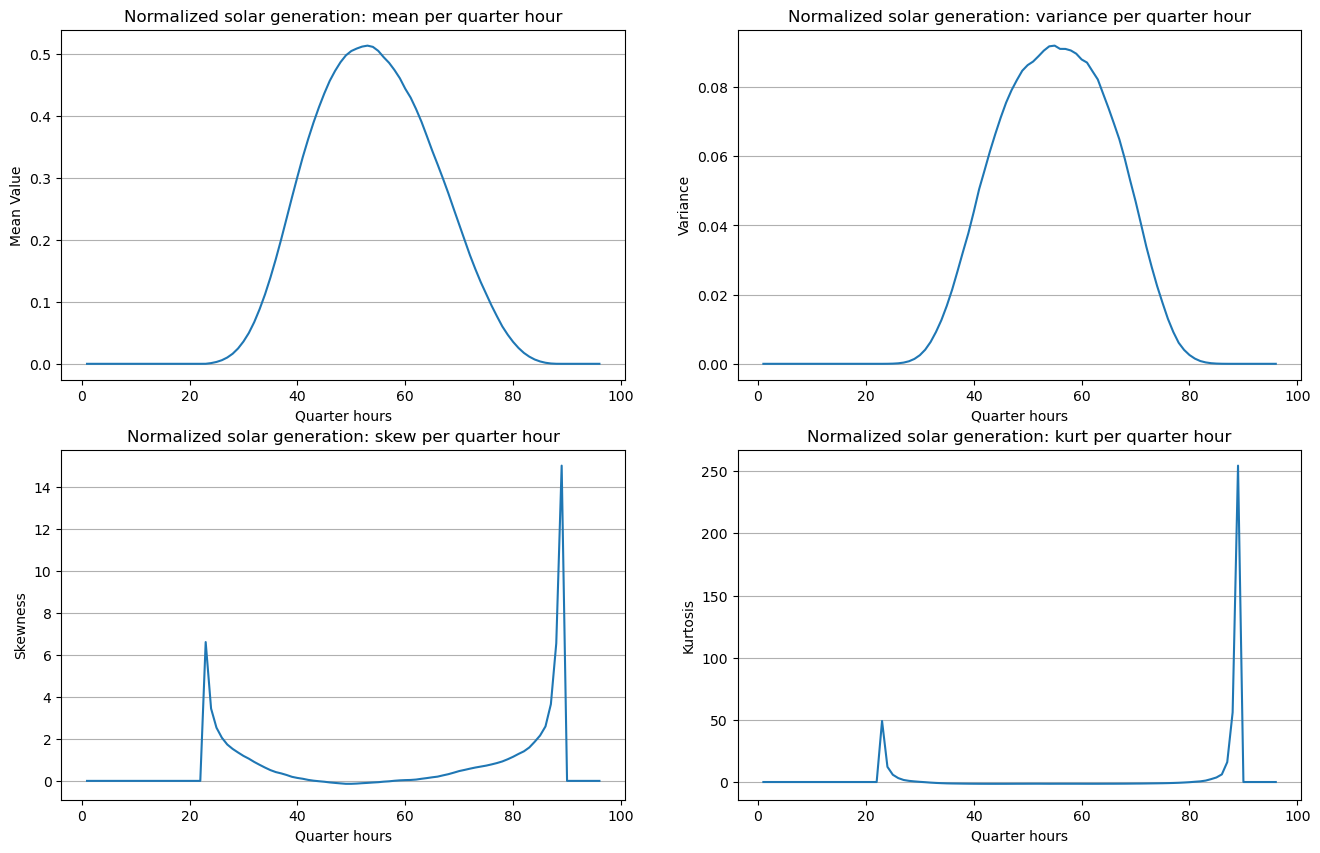

In [ ]:
solargen_mean = solargen.mean(axis=1)
solargen_var = solargen.var(axis=1)
solargen_skew = solargen.skew(axis=1)
solargen_kurt = solargen.kurt(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(solargen_mean.index, solargen_mean)
axs[0,0].set_title('Normalized solar generation: mean per quarter hour')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var.index, solargen_var)
axs[0,1].set_title('Normalized solar generation: variance per quarter hour')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Variance')
axs[0,1].grid(axis='y')

axs[1,0].plot(solargen_skew.index, solargen_skew)
axs[1,0].set_title('Normalized solar generation: skew per quarter hour')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Skewness')
axs[1,0].grid(axis='y')

axs[1,1].plot(solargen_kurt.index, solargen_kurt)
axs[1,1].set_title('Normalized solar generation: kurt per quarter hour')
axs[1,1].set_xlabel('Quarter hours')
axs[1,1].set_ylabel('Kurtosis')
axs[1,1].grid(axis='y')

In [ ]:
# Mean of the statistical moments
solargen_mean_mean = solargen_mean.mean()
print(round(solargen_mean_mean, 2))
solargen_mean_var = solargen_var.mean()
print(round(solargen_mean_var, 2))
solargen_mean_skew = solargen_skew.mean()
print(round(solargen_mean_skew, 2))
solargen_mean_kurt = solargen_kurt.mean()
print(round(solargen_mean_kurt, 2))

0.16
0.03
0.74
3.69


First difference

In [ ]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
# kWh -> kW
solargen = solargen*10
# Drop the first row and column (headers)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
solargen.index = range(1, len(solargen) + 1)
# Drop the last column: 366 days -> 365 days
solargen = solargen.iloc[:, :-1]

# On the rows
solargen = solargen.diff(axis=1).drop(solargen.columns[0], axis=1)

# On the columns
#solargen = solargen.diff().iloc[1:]


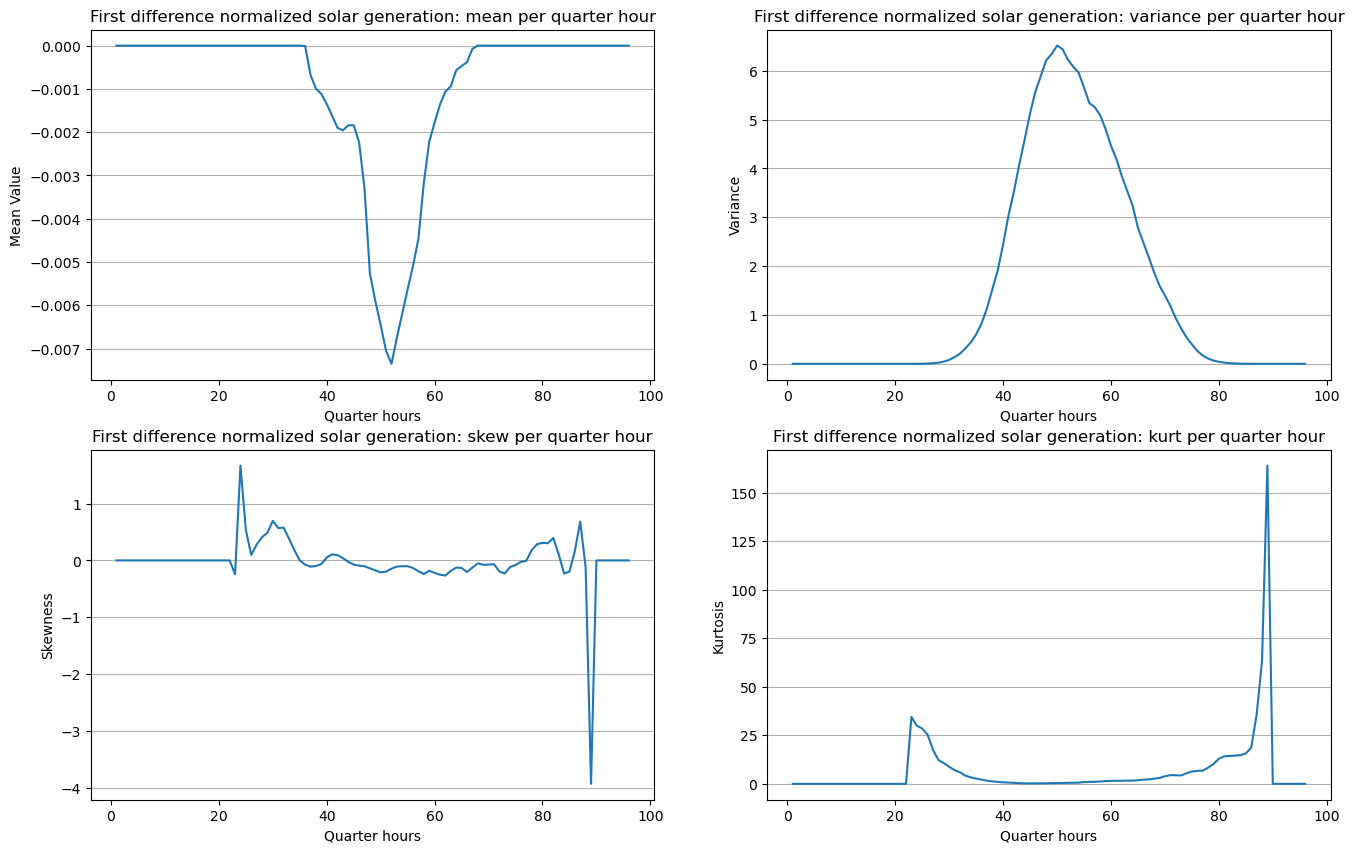

In [ ]:
solargen_mean = solargen.mean(axis=1)
solargen_var = solargen.var(axis=1)
solargen_skew = solargen.skew(axis=1)
solargen_kurt = solargen.kurt(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(solargen_mean.index, solargen_mean)
axs[0,0].set_title('First difference normalized solar generation: mean per quarter hour')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var.index, solargen_var)
axs[0,1].set_title('First difference normalized solar generation: variance per quarter hour')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Variance')
axs[0,1].grid(axis='y')

axs[1,0].plot(solargen_skew.index, solargen_skew)
axs[1,0].set_title('First difference normalized solar generation: skew per quarter hour')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Skewness')
axs[1,0].grid(axis='y')

axs[1,1].plot(solargen_kurt.index, solargen_kurt)
axs[1,1].set_title('First difference normalized solar generation: kurt per quarter hour')
axs[1,1].set_xlabel('Quarter hours')
axs[1,1].set_ylabel('Kurtosis')
axs[1,1].grid(axis='y')

In [ ]:
# Mean of the statistical moments
solargen_mean_mean = solargen_mean.mean()
print(round(solargen_mean_mean, 2))
solargen_mean_var = solargen_var.mean()
print(round(solargen_mean_var, 2))
solargen_mean_skew = solargen_skew.mean()
print(round(solargen_mean_skew, 2))
solargen_mean_kurt = solargen_kurt.mean()
print(round(solargen_mean_kurt, 2))

-0.0
1.54
-0.01
6.84


Second difference

In [ ]:
solargen = pd.read_excel('./data/Belgium_solar_generation_probability_density.xlsx', sheet_name='Solar_profiles',header=None)
# kWh -> kW
solargen = solargen*10
# Drop the first row and column (headers)
solargen = solargen.drop(index=0, columns=0).reset_index(drop=True)
# Adjust the index to start at 1
solargen.index = range(1, len(solargen) + 1)
# Drop the last column: 366 days -> 365 days
solargen = solargen.iloc[:, :-1]

# On the rows
solargen = solargen.diff(axis=1).diff(axis=1).drop(solargen.columns[0:2], axis=1)

# On the columns
#solargen = solargen.diff().iloc[1:].diff().iloc[1:]


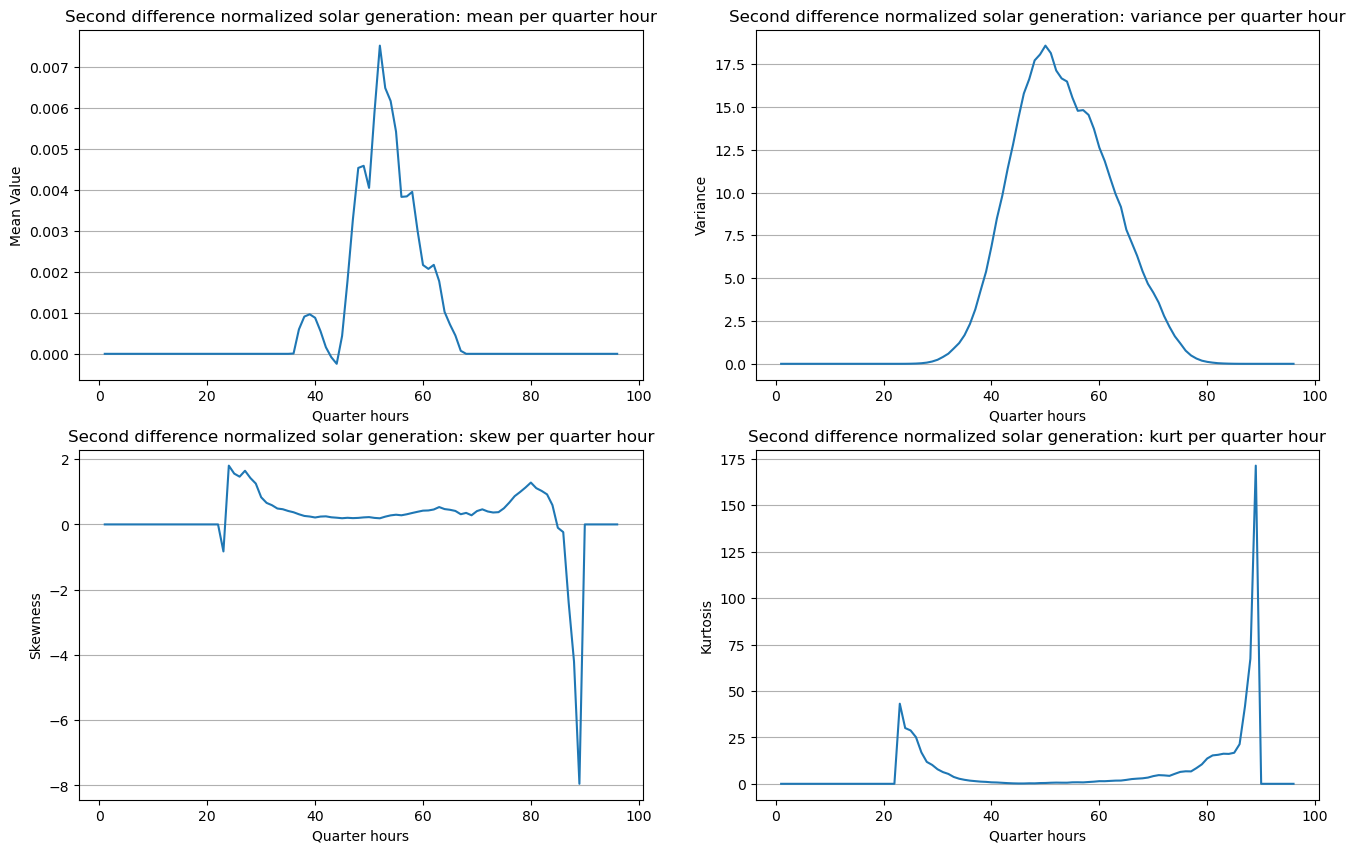

In [ ]:
solargen_mean = solargen.mean(axis=1)
solargen_var = solargen.var(axis=1)
solargen_skew = solargen.skew(axis=1)
solargen_kurt = solargen.kurt(axis=1)

fig, axs = plt.subplots(2, 2, figsize=(16, 10))  # 2 row, 2 columns
axs[0,0].plot(solargen_mean.index, solargen_mean)
axs[0,0].set_title('Second difference normalized solar generation: mean per quarter hour')
axs[0,0].set_xlabel('Quarter hours')
axs[0,0].set_ylabel('Mean Value')
axs[0,0].grid(axis='y')

axs[0,1].plot(solargen_var.index, solargen_var)
axs[0,1].set_title('Second difference normalized solar generation: variance per quarter hour')
axs[0,1].set_xlabel('Quarter hours')
axs[0,1].set_ylabel('Variance')
axs[0,1].grid(axis='y')

axs[1,0].plot(solargen_skew.index, solargen_skew)
axs[1,0].set_title('Second difference normalized solar generation: skew per quarter hour')
axs[1,0].set_xlabel('Quarter hours')
axs[1,0].set_ylabel('Skewness')
axs[1,0].grid(axis='y')

axs[1,1].plot(solargen_kurt.index, solargen_kurt)
axs[1,1].set_title('Second difference normalized solar generation: kurt per quarter hour')
axs[1,1].set_xlabel('Quarter hours')
axs[1,1].set_ylabel('Kurtosis')
axs[1,1].grid(axis='y')

In [ ]:
# Mean of the statistical moments
solargen_mean_mean = solargen_mean.mean()
print(round(solargen_mean_mean, 2))
solargen_mean_var = solargen_var.mean()
print(round(solargen_mean_var, 2))
solargen_mean_skew = solargen_skew.mean()
print(round(solargen_mean_skew, 2))
solargen_mean_kurt = solargen_kurt.mean()
print(round(solargen_mean_kurt, 2))

0.0
4.33
0.19
7.19
